In [ ]:
import serial
import time
import csv

# Set serial parameters (adjust according to your Arduino device)
PORT = "COM3"  # Check the port in Windows Device Manager, Linux/macOS might use "/dev/ttyUSB0"
BAUDRATE = 500000  # Must match the baud rate set in Arduino code
FILENAME = "data.csv"  # Output file for storing data

# Open the serial port
ser = serial.Serial(PORT, BAUDRATE, timeout=1)
time.sleep(2)  # Wait for Arduino to initialize

# Create a CSV file and write the header
with open(FILENAME, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Timestamp", "SensorValue"])  # Add column headers

    print("Data acquisition started... Press Ctrl+C to stop")
    try:
        while True:
            line = ser.readline().decode("utf-8").strip()  # Read and decode serial data
            if line:
                timestamp = time.time()  # Get the current timestamp
                writer.writerow([timestamp, line])  # Write data to CSV file
                print(timestamp, line)  # Display data in the terminal
    except KeyboardInterrupt:
        print("Data acquisition stopped")  # Handle manual interruption

# Close the serial port
ser.close()


In [ ]:
""" plot """
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 数据
df = pd.read_csv("your_file.csv")  # 修改为你的文件名

# 画图
plt.figure(figsize=(12, 6))
plt.plot(df["Time (ms)"], df["EMG1"], label="EMG Sensor 1 (A0)")
plt.plot(df["Time (ms)"], df["EMG2"], label="EMG Sensor 2 (A1)")
plt.plot(df["Time (ms)"], df["EMG3"], label="EMG Sensor 3 (A2)")
plt.plot(df["Time (ms)"], df["EMG4"], label="EMG Sensor 4 (A3)")

plt.xlabel("Time (ms)")
plt.ylabel("EMG Value")
plt.title("MyoWare EMG Signal (4 Sensors)")
plt.legend()
plt.show()


   Time (ms)  EMG Value
0      0.996         39
1      2.020         39
2      3.035         40
3      4.033         39
4      4.033         38


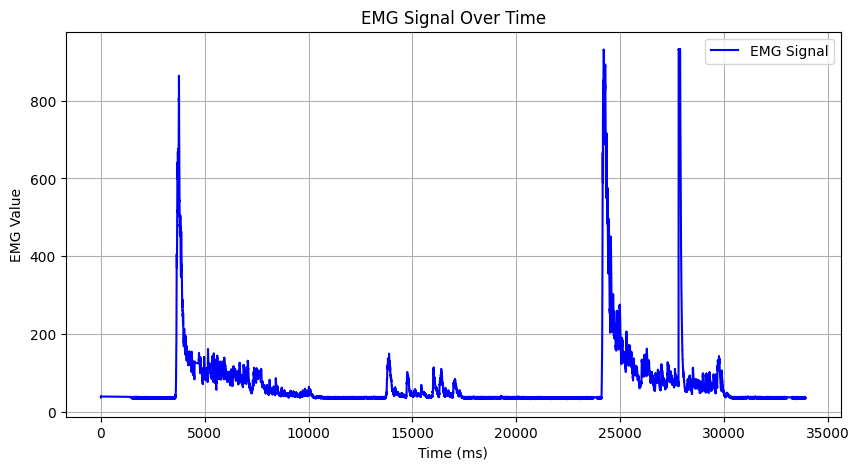

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
csv_file = r"E:\MSC\Spring\AML\GestureLink\emg_data_20250219_162337.csv"  # 请替换成你的 CSV 文件路径
df = pd.read_csv(csv_file)

# 确保列名正确（可打印 df.columns 查看）
print(df.head())  

# 画出 EMG 数据曲线
plt.figure(figsize=(10, 5))
plt.plot(df["Time (ms)"], df["EMG Value"], label="EMG Signal", color='b')

# 设置标题和标签
plt.title("EMG Signal Over Time")
plt.xlabel("Time (ms)")
plt.ylabel("EMG Value")
plt.legend()
plt.grid()

# 显示图表
plt.show()


   Time (ms)  EMG Value
0      0.000         39
1      1.095         38
2      1.095         38
3      1.095         38
4      2.107         38


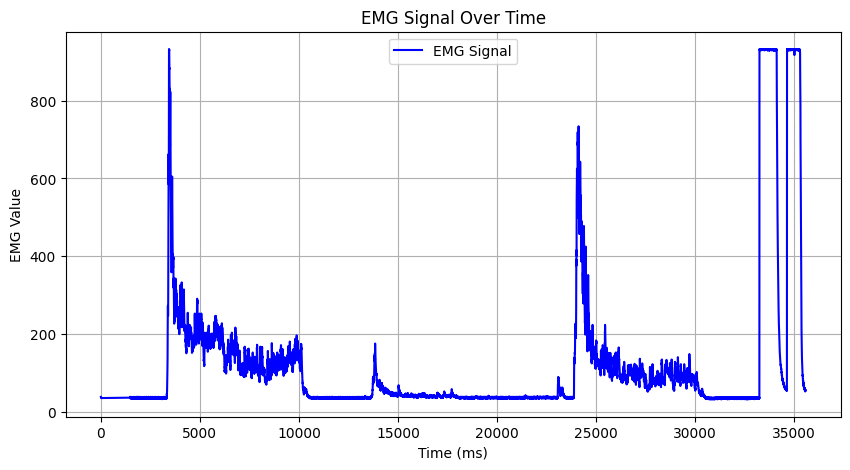

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
csv_file = r"E:\MSC\Spring\AML\GestureLink\emg_data_20250219_161638.csv"  # 请替换成你的 CSV 文件路径
df = pd.read_csv(csv_file)

# 确保列名正确（可打印 df.columns 查看）
print(df.head())  

# 画出 EMG 数据曲线
plt.figure(figsize=(10, 5))
plt.plot(df["Time (ms)"], df["EMG Value"], label="EMG Signal", color='b')

# 设置标题和标签
plt.title("EMG Signal Over Time")
plt.xlabel("Time (ms)")
plt.ylabel("EMG Value")
plt.legend()
plt.grid()

# 显示图表
plt.show()


# TODO

- test every musel, and from different angles
- test four musels together
- set imu 
- save data
- think about the 怎么做成一个东西固定


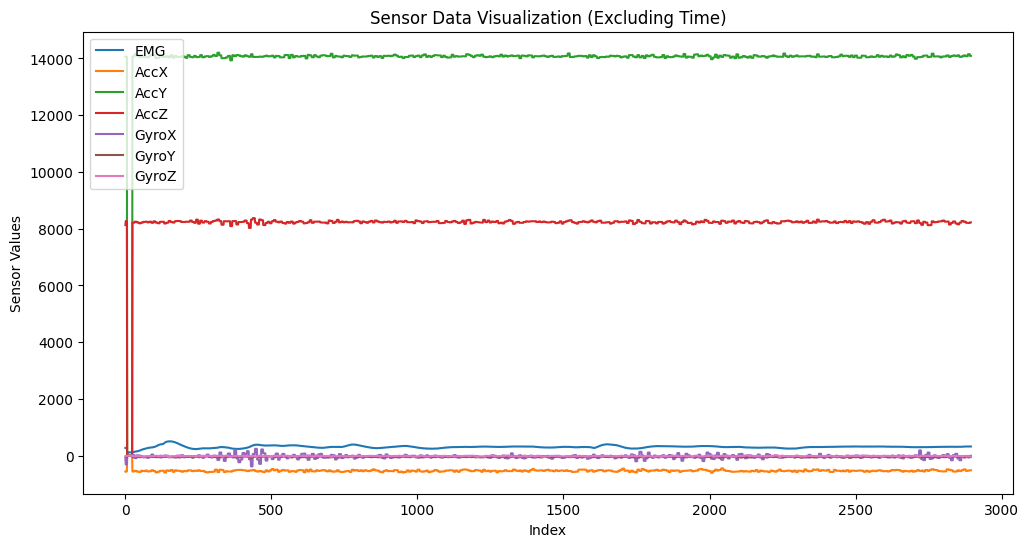

In [1]:
import pandas as pd

# 读取用户上传的 CSV 文件
file_path = "sensor_data_20250228_160449.csv"
df = pd.read_csv(file_path)

# 显示前几行数据以了解结构
df.head()
import matplotlib.pyplot as plt

# 过滤掉时间列，只保留数值列
df_numeric = df.drop(columns=["Time (ms)"])

# 绘制所有数值列的折线图
plt.figure(figsize=(12, 6))
for column in df_numeric.columns:
    plt.plot(df_numeric.index, df_numeric[column], label=column)

plt.xlabel("Index")
plt.ylabel("Sensor Values")
plt.title("Sensor Data Visualization (Excluding Time)")
plt.legend()
plt.show()
